Завдання 1.
1.	Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.

In [1]:
# Завантаження бібліотек
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

In [2]:
# Завантаження та підготовка даних
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

# Задання архітектури автокодувальника
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Epoch 1/50
235/235 [==============================] - 6s 17ms/step - loss: 0.2421 - val_loss: 0.1666
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1491 - val_loss: 0.1350
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1302 - val_loss: 0.1237
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1214 - val_loss: 0.1162
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1155 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1116 - val_loss: 0.1089
Epoch 7/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1083 - val_loss: 0.1056
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1057 - val_loss: 0.1036
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1038 - val_loss: 0.1014
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1020 - val_lo

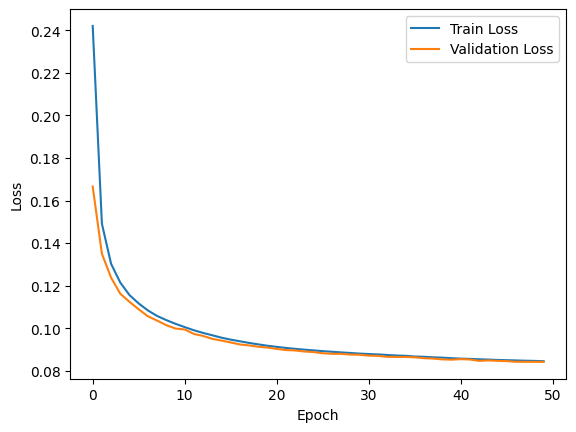

In [4]:
# Створення моделі автокодувальника
autoencoder = Model(input_img, decoded)

# Компіляція моделі
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренування моделі
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Графіки функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Побудова результатів розпізнавання
decoded_imgs = autoencoder.predict(x_test)

# Відображення оригінальних та відновлених зображень
n = 10  # Кількість зображень, що відображаються
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальне зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відновлене зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Роблячи висновок, слід зазначити, Функція втрат під час тренування автокодувальника зменшується як для навчального, так і для валідаційного набору даних протягом епох.

Однак, після певної кількості епох може виникнути перенавчання, що може призвести до зростання втрат на валідаційному наборі даних.

Важливо відзначити, що автокодувальник з вказаною архітектурою здатний відтворювати вхідні дані, що вказує на його успішність у завданні автокодування.

Графіки функції втрат допомагають візуалізувати процес тренування моделі та динаміку зміни втрат протягом часу.

2.	Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.

In [5]:
#Завантаження бібліотек
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
# Завантаження даних MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [7]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
# Додавання каналу зображення
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

# Зміна форми даних до 20x20
x_train = tf.image.resize(x_train, [20, 20])
x_test = tf.image.resize(x_test, [20, 20])

In [9]:
# Створення моделі автокодувальника
model = models.Sequential([
    layers.Input(shape=(20, 20, 1)),
    # Додаткові шари моделі
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [10]:
# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy')

# Функція для побудови графіків функції втрат
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/10
469/469 [==============================] - 61s 127ms/step - loss: 0.2546 - val_loss: 0.1910
Epoch 2/10
469/469 [==============================] - 55s 118ms/step - loss: 0.1788 - val_loss: 0.1692
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1650 - val_loss: 0.1598
Epoch 4/10
469/469 [==============================] - 55s 117ms/step - loss: 0.1584 - val_loss: 0.1542
Epoch 5/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1538 - val_loss: 0.1502
Epoch 6/10
469/469 [==============================] - 56s 120ms/step - loss: 0.1504 - val_loss: 0.1474
Epoch 7/10
469/469 [==============================] - 56s 119ms/step - loss: 0.1477 - val_loss: 0.1449
Epoch 8/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1458 - val_loss: 0.1432
Epoch 9/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1439 - val_loss: 0.1423
Epoch 10/10
469/469 [==============================] - 56s 120ms/step - l

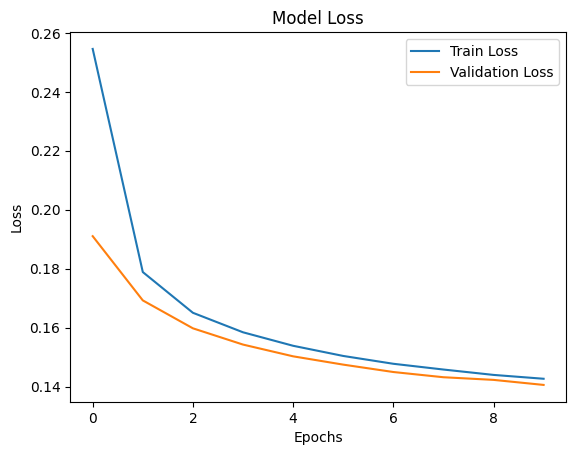

313/313 [==============================] - 3s 9ms/step


In [11]:
# Навчання моделі і збереження історії навчання
history = model.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Виклик функції для побудови графіка функції втрат
plot_loss(history)

# Отримання результатів розпізнавання
decoded_imgs = model.predict(x_test)

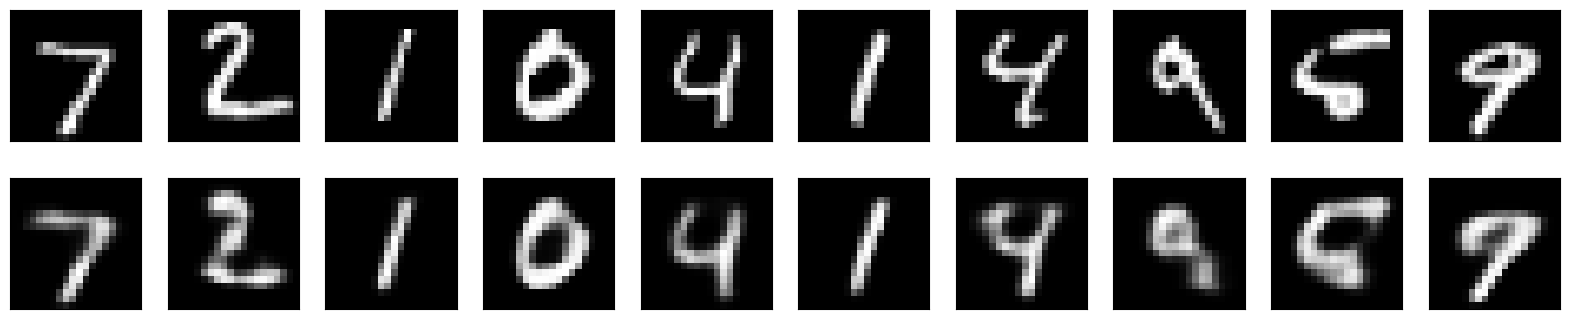

In [12]:
# Відображення оригінальних та відновлених зображень
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Відображення оригінального зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].numpy().reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відображення відновленого зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Отже, роблячи висновки, можна точно сказати, що Відновлені зображення, отримані після тренування моделі, досить схожі на вихідні зображення. Це свідчить про те, що автокодувальник успішно навчився реконструювати вхідні дані. А це означає у свою чергу, що навчену модель автокодувальника можна успішно використовувати для відтворення та реконструкції зображень з набору даних MNIST.